# [通し課題]

8. DAY2、3で学んだことの取り組み • 交差検証、ホールドアウト法などで汎化性能を確認する  
 • 欠測値と異常値を確認し、適切に処理する  
 • DAY2、3で学んだアルゴリズムを利用してモデルをつくり、DAY1宿題提出時の精度と比較する  
 • 交差検証によるパラメータチューニングを行う  
 • パラメータチューニング後のモデルによって、精度および結果の評価を行う  
 • その他、精度の向上ができるような処理に取り組み、精度を上げる  
 • できたところまでをNotebookでまとめ、宿題として提出する  
 • 前回から取り組んだ内容・工夫、精度がどのように変化したかのコメントを Notebookに含めること  
 • 15分程度，受講者同士で通し課題の進捗を見せ合う時間を設けます  
9. DAY4では、DAY3宿題の提出ファイルを元に、最終発表を実施いただ

# 0. DAY1での実施事項


In [1]:
#********************************************************************
# pandas,numpy,matplotlib,codecs,sklearnの各ライブラリをインポート
#********************************************************************

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import seaborn as sns

#********************************************************************
#.該当課題のデータを読み込む
#********************************************************************
#201801のデータを読み込んでみる
with cd.open('ks-projects-201801.csv', 'r', 'utf-8', 'ignore') as f18:
    df_f18 = pd.read_csv(f18)
#df_f18 = pd.read_csv('ks-projects-201801.csv')

#********************************************************************
#.欠損値がある行は、とりあえずなくしてみる
#********************************************************************
#１個でも欠損値がある行はとりあえず削除してみる。
df_f18_dna = df_f18.dropna(how='any')

#********************************************************************
#.成功（'successful'）と失敗（'failed'）に絞って考える。
#********************************************************************
#成功だけを抽出したDFと失敗だけを抽出したDF
df_f18_success = df_f18_dna[df_f18_dna['state']=='successful']
df_f18_failed =  df_f18_dna[df_f18_dna['state']=='failed']
#両方を結合
df_f18_SorF = pd.concat([df_f18_success,df_f18_failed])

#********************************************************************
#.'state'をカテゴリ変数（文字列）から数値化してみる。
#********************************************************************
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_f18_SorF['state'])
df_f18_SorF['state'] = le.transform(df_f18_SorF['state'])

#********************************************************************
#.ロジスティック回帰で分類してみる。
#　「goal」、「backers」を有効そうな説明変数とする。
#********************************************************************
#目的変数'state'を正解としてyに格納
y = df_f18_SorF['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_f18_SorF[['goal', 'backers']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

#********************************************************************
#.予測精度または識別精度を確認する
#　混同行列を作成し、Accuracy、Recall、Precisionを求める
#********************************************************************
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

2996 19902
103320 80771
Accuracy  = 88.938%
Recall    = 96.423%
Precision = 80.231%


## 0.1.他の説明変数についても考察してみる

Day1で考察した説明変数以外にも使える変数がないか考察してみる。

### 【仮説１】期間について成功、失敗に影響するのではないか？

In [2]:
import datetime as dt
# 'deadline' 'launched' の項目をdatetimeに変更
df_f18_SorF['deadline'] = pd.to_datetime(df_f18_SorF['deadline'], errors = 'coerce')
df_f18_SorF['launched'] = pd.to_datetime(df_f18_SorF['launched'], errors = 'coerce')
# 'deadline' 'launched' の間の日数を示す'period'を作成
df_f18_SorF['period'] = df_f18_SorF['deadline'] - df_f18_SorF['launched']

days = []

#'period'の日数を'days'に抽出
for i in df_f18_SorF.index:
    days.append(df_f18_SorF['period'][i].days)

df_f18_SorF['days'] = days
display(df_f18_SorF[['state','period','days']].head())


,state,period,days
5,1,34 days 10:21:33,34
6,1,19 days 05:29:16,19
11,1,29 days 17:17:02,29
14,1,27 days 04:15:42,27
18,1,14 days 09:48:28,14


In [3]:
#いったんCSVに出力する。
df_f18_SorF.to_csv("df_f18_SorF.csv")

In [1]:
#********************************************************************
# pandas,numpy,matplotlib,codecs,sklearnの各ライブラリをインポート
#********************************************************************

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import seaborn as sns

#********************************************************************
#.該当課題のデータを読み込む
#********************************************************************
#201801のデータを読み込んでみる
with cd.open('df_f18_SorF.csv', 'r', 'utf-8', 'ignore') as f18:
    df_f18_SorF = pd.read_csv(f18)

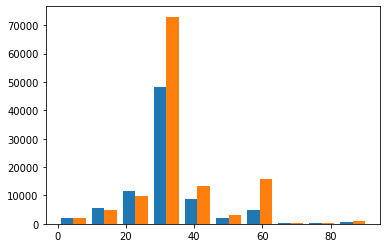

In [2]:
#成功と、失敗でデータを分ける。
df_f18_S = df_f18_SorF[df_f18_SorF['state']==1]
df_f18_F = df_f18_SorF[df_f18_SorF['state']==0]

#それぞれを'days'についてヒストグラムを書いてみる
plt.hist([df_f18_S["days"], df_f18_F["days"]], stacked=False)
plt.show()

プロジェクト期間が長いほうが成功している割合が高いことがわかった。  
プロジェクト期間（'days'）も説明変数として使ってみることとする。

### 【仮説２】countryについて成功、失敗に影響するのではないか。

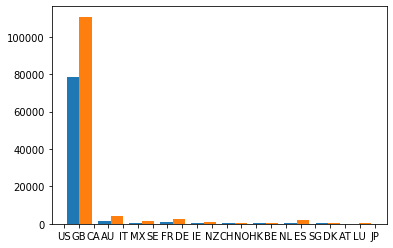

In [3]:
#それぞれを'country'についてヒストグラムを書いてみる
plt.hist([df_f18_S["country"], df_f18_F["country"]], stacked=False)
plt.show()

成功率が高い国と、低い国があることがわかった。

In [2]:
#'country'ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_ct = df_f18_SorF.groupby('country',as_index=False)
df_f18_gb_ct_mn = df_f18_gb_ct.mean()

#'state'は成功が'1',失敗が'0'なので、'country'毎の'state'の平均は
#その国の成功する割合（確率）と等価なので名称変更
df_f18_gb_ct_mn = df_f18_gb_ct_mn.rename(columns={'state': 'country_rate'}) 
display(df_f18_gb_ct_mn[['country','country_rate']])


#元のデータフレームに、国ごとの成功する確率を結合
df_f18_SRate = pd.merge(df_f18_SorF, df_f18_gb_ct_mn[['country','country_rate']], on='country')

,country,country_rate
0,AT,0.242812
1,AU,0.300825
2,BE,0.306306
3,CA,0.333850
4,CH,0.300000
5,DE,0.281844
6,DK,0.372414
7,ES,0.253475
8,FR,0.352086
9,GB,0.408828


国ごとの成功率(country_state_rate)も説明変数としてつかってみることにする。

### 【仮説３】category，main_categoryについて成功、失敗に影響するのではないか。

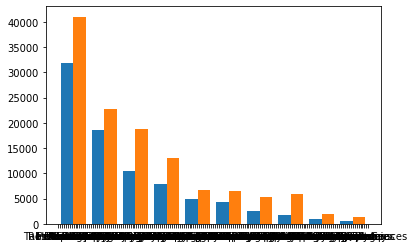

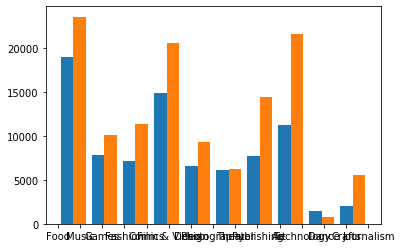

In [5]:
#それぞれについてヒストグラムを書いてみる
plt.hist([df_f18_S["category"], df_f18_F["category"]], stacked=False)
plt.show()
#それぞれについてヒストグラムを書いてみる
plt.hist([df_f18_S["main_category"], df_f18_F["main_category"]], stacked=False)
plt.show()

'country'同様にカテゴリーごとに成功率が違うことが分かった。  

In [3]:
#"main_category"ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_mc = df_f18_SorF.groupby("main_category",as_index=False)
df_f18_gb_mc_mn = df_f18_gb_mc.mean()

#'state'は成功が'1',失敗が'0'なので、'main_category'毎の'state'の平均は
#そのメインカテゴリーの成功する割合（確率）と等価なので名称変更
df_f18_gb_mc_mn = df_f18_gb_mc_mn.rename(columns={'state': 'main_category_rate'}) 
display(df_f18_gb_mc_mn[['main_category','main_category_rate']])

#国ごとの成功率を追加したデータフレームに、メインカテゴリーごとの成功する確率を結合
df_f18_SRate = pd.merge(df_f18_SRate, df_f18_gb_mc_mn[['main_category','main_category_rate']], on='main_category')

,main_category,main_category_rate
0,Art,0.451686
1,Comics,0.587701
2,Crafts,0.275224
3,Dance,0.657432
4,Design,0.417008
5,Fashion,0.283365
6,Film & Video,0.418766
7,Food,0.273291
8,Games,0.439428
9,Journalism,0.245217


In [4]:
#"category"ごとにグループ化し、平均をとったデータフレームを作成する
df_f18_gb_cg = df_f18_SorF.groupby("category",as_index=False)
df_f18_gb_cg_mn = df_f18_gb_cg.mean()

#'state'は成功が'1',失敗が'0'なので、'category'毎の'state'の平均は
#そのカテゴリーの成功する割合（確率）と等価なので名称変更
df_f18_gb_cg_mn = df_f18_gb_cg_mn.rename(columns={'state': 'category_rate'}) 
display(df_f18_gb_cg_mn[['category','category_rate']])

#国ごとの成功率を追加したデータフレームに、カテゴリーごとの成功する確率を結合
df_f18_SRate = pd.merge(df_f18_SRate, df_f18_gb_cg_mn[['category','category_rate']], on='category')

,category,category_rate
0,3D Printing,0.408451
1,Academic,0.264151
2,Accessories,0.373451
3,Action,0.199468
4,Animals,0.265823
5,Animation,0.301083
6,Anthologies,0.697228
7,Apparel,0.236663
8,Apps,0.072260
9,Architecture,0.279012


## 0.2 新たに'days','country_rate','main_category_rate','category_rate'を加えてロジスティック回帰で分類してみる。

In [26]:
#********************************************************************
#.ロジスティック回帰で分類してみる。
#　「goal」、「backers」を有効そうな説明変数とする。
#********************************************************************
#目的変数'state'を正解としてyに格納
y = df_f18_SRate['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_f18_SRate[['goal', 'backers','days','country_rate','main_category_rate','category_rate']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

#********************************************************************
#.予測精度または識別精度を確認する
#　混同行列を作成し、Accuracy、Recall、Precisionを求める
#********************************************************************
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

4235 14040
109182 79532
Accuracy  = 91.171%
Recall    = 94.944%
Precision = 84.996%


# １．交差検証、ホールドアウト法などで汎化性能を確認する  

## 1.1. 欠測値と異常値を確認し、適切に処理する 

欠測値は、DAY１の段階で削除してしまっているので、説明変数の異常値について考察してみる。

### 「goal」の異常値について考えてみる。

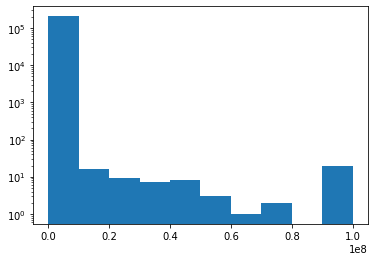

In [8]:
#'goal'についてヒストグラムを書いてみる
plt.hist(df_f18_SRate['goal'],log=True)
plt.show()

(19,)

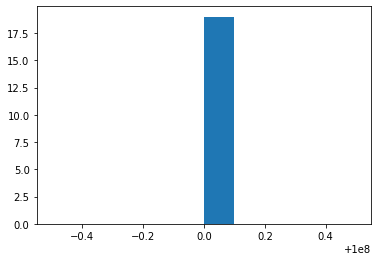

1514      100000000.0
58470     100000000.0
68612     100000000.0
86687     100000000.0
93295     100000000.0
93426     100000000.0
95647     100000000.0
96653     100000000.0
128171    100000000.0
135722    100000000.0
166919    100000000.0
170659    100000000.0
172789    100000000.0
184178    100000000.0
185267    100000000.0
186427    100000000.0
194729    100000000.0
196342    100000000.0
201782    100000000.0
Name: goal, dtype: float64

In [9]:
#ヒストグラムで少し離れている1e8のあたりに着目してみる。
df_tmp = df_f18_SRate['goal'][df_f18_SRate['goal']>99999999]
#件数数える
display(df_tmp.shape)
#ヒストグラム描いてみる
plt.hist(df_tmp)
plt.show()
#データ見てみる
display(df_tmp)

'goal'は、100000000以上（上限？）の場合は、100000000にそろえられているように見える。  
このレコードは学習の対象から外してみることにする。

### 「backers」の異常値について考えてみる。

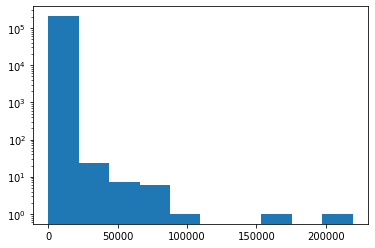

In [10]:
#'backers'についてヒストグラムを書いてみる
plt.hist(df_f18_SRate['backers'],log=True)
plt.show()

(2,)

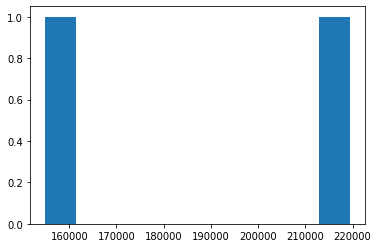

98446     154926.0
122168    219382.0
Name: backers, dtype: float64

In [11]:
#ヒストグラムで少し離れている150000のあたりに着目してみる。
df_tmp = df_f18_SRate['backers'][df_f18_SRate['backers']>150000]
#件数数える
display(df_tmp.shape)
#ヒストグラム描いてみる
plt.hist(df_tmp)
plt.show()
#データ見てみる
display(df_tmp)

2件大きな値があるので、外れ値（異常値）として学習データからのぞいてみる。

### 異常値を除いたデータを使ってロジスティック回帰で分類してみる。

In [5]:
#####################################
#異常値を除いたデータフレームを作る。
#####################################
#goalの異常値を除いたデータフレーム
df_train = df_f18_SRate[df_f18_SRate['goal']<99999999]
#さらに、backersの異常値を除いたデータフレーム
df_train = df_train[df_train['backers']<150000]
df_train.shape

(206968, 21)

In [109]:
#********************************************************************
#.ロジスティック回帰で分類してみる。
#　「goal」、「backers」を有効そうな説明変数とする。
#********************************************************************
#目的変数'state'を正解としてyに格納
y = df_train['state'].values
#説明変数'goal','backers','days','country_rate','main_category_rate','category_rate'を入力としてXに格納
X = df_train[['goal', 'backers','days','country_rate','main_category_rate','category_rate']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

#********************************************************************
#.予測精度または識別精度を確認する
#　混同行列を作成し、Accuracy、Recall、Precisionを求める
#********************************************************************
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

4330 13839
109364 79435
Accuracy  = 91.221%
Recall    = 94.831%
Precision = 85.163%


Accuracyが、91.171%から91.221%にわずかに向上。

##  1.2. DAY2、3で学んだアルゴリズムを利用してモデルをつくり、DAY1宿題提出時の精度と比較する

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

In [14]:
#********************************************************************
#.SVMで分類してみる。
#　'goal','backers','days','country_rate','main_category_rate','category_rate'を有効そうな説明変数とする。
#********************************************************************
#目的変数'state'を正解としてyに格納
y = df_train['state'].values
#説明変数'goal','backers','days','country_rate','main_category_rate','category_rate'を入力としてXに格納
X = df_train[['goal', 'backers','days','country_rate','main_category_rate','category_rate']].values

# SVMのパラメータ設定
C = 5
kernel = "rbf"
gamma = 1

# SVMで学習
clf_SVM = SVC(C=C, kernel=kernel, gamma=gamma)
clf_SVM.fit(X, y)

#********************************************************************
#.識別精度を確認する
#　混同行列を作成し、Accuracy、Recall、Precisionを求める
#********************************************************************
# 学習した結果を使って説明変数を入力して予測
y_est = clf_SVM.predict(X)

#混同行列を作成
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp)))

2985 3558
119645 80780
Accuracy  = 96.839%
Recall    = 96.436%
Precision = 95.781%


### 1.3. 交差検証によるパラメータチューニングを行う

In [14]:
# ホールドアウト法に関する関数
from sklearn.model_selection import train_test_split
# 交差検証法に関する関数
from sklearn.model_selection import KFold
# 回帰問題における性能評価に関する関数
from sklearn.metrics import mean_absolute_error

ホールドアウト法で、最終的に性能を見るためのテストデータを別にする。（３０％をテストデータに）  
パラメータチューニングには５分割で交差検証を行う。

In [15]:
#目的変数'state'を正解としてyに格納
y = df_train['state'].values
#説明変数'goal','backers','days','country_rate','main_category_rate','category_rate'を入力としてXに格納
X = df_train[['goal', 'backers','days','country_rate','main_category_rate','category_rate']].values

# 全データのうち、30%をテストデータにする
test_size = 0.3

# ホールドアウト法を実行（テストデータはランダム選択）
#X_train : 学習用データの説明変数
#X_test : テスト用データの説明変数
#y_train : 学習用データの目的変数
#y_test : テスト用データの目的変数
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(144877, 6) (62091, 6) (144877,) (62091,)


In [17]:
# scikit-learnに入力するために整形
#X = X.reshape(-1,1)

# グループ数を設定（今回は5分割）
n_split = 5 

#評価値と試行回数を初期化
cross_valid_acc = 0
cross_valid_rec = 0
cross_valid_pre = 0
test_num = 1

# SVMのパラメータ設定
C = 5
kernel = "rbf"
gamma = 1


# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X_train, y_train):
    #学習用データ
    X_valid_train, y_valid_train = X[train_idx], y[train_idx] 
    #テスト用データ
    X_valid_test, y_valid_test = X[test_idx], y[test_idx]     
    

    # 学習用データを使ってSVMでモデルを学習
    # SVMで学習
    clf_SVM = SVC(C=C, kernel=kernel, gamma=gamma)
    clf_SVM.fit(X_valid_train, y_valid_train)

    # テストデータに対する予測を実行
    y_pred_test = clf_SVM.predict(X_valid_test)

    #混同行列を作成
    tn, fp, fn, tp = confusion_matrix(y_valid_test, y_pred_test).ravel()
    print(fn, fp)
    print(tn, tp)

    Acc = 100 * (tn+tp)/(tn+fp+fn+tp)
    Rec = 100 * (tp)/(fn+tp)
    Pre = 100 * (tp)/(fp+tp)

    #'Accuracy、Recall、Precisionを求めて表示
    print('N  = %s'%test_num)
    print('Accuracy  = {:.3f}%'.format(Acc))
    print('Recall    = {:.3f}%'.format(Rec))
    print('Precision = {:.3f}%'.format(Pre))
    
    cross_valid_acc += Acc #後で平均を取るためにAccuracyを加算
    cross_valid_rec += Rec #後で平均を取るためにRecallを加算
    cross_valid_pre += Pre #後で平均を取るためにPreciionを加算
    test_num += 1

# 各指標の平均値を最終的な汎化誤差値とする
final_acc = cross_valid_acc / n_split
final_rec = cross_valid_rec / n_split
final_pre = cross_valid_pre / n_split
print("Cross Validation Accuracy  = %s"%round(final_acc, 3))
print("Cross Validation Recall  = %s"%round(final_rec, 3))
print("Cross Validation Precision  = %s"%round(final_pre, 3))

952 3372
13108 11544
N  = 1
Accuracy  = 85.077%
Recall    = 92.382%
Precision = 77.393%
950 3082
13916 11028
N  = 2
Accuracy  = 86.085%
Recall    = 92.069%
Precision = 78.157%
1217 4379
11434 11945
N  = 3
Accuracy  = 80.687%
Recall    = 90.754%
Precision = 73.174%
947 4977
12504 10547
N  = 4
Accuracy  = 79.555%
Recall    = 91.761%
Precision = 67.940%
542 4360
10960 13113
N  = 5
Accuracy  = 83.082%
Recall    = 96.031%
Precision = 75.047%
Cross Validation Accuracy  = 82.897
Cross Validation Recall  = 92.599
Cross Validation Precision  = 74.342


In [ ]:
# scikit-learnに入力するために整形
#X = X.reshape(-1,1)

# グループ数を設定（今回は5分割）
n_split = 5 

#評価値と試行回数を初期化
cross_valid_acc = 0
cross_valid_rec = 0
cross_valid_pre = 0
test_num = 1

for j in [1,2,3,4]:
    # SVMのパラメータ設定
    C = j
    kernel = "rbf"
    gamma = 1

    print('C  = {:.3f}%'.format(j))
    print('gamma    = {:.3f}%'.format(gamma))
    
    # テスト役を交代させながら学習と評価を繰り返す
    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X_train, y_train):
        #学習用データ
        X_valid_train, y_valid_train = X[train_idx], y[train_idx] 
        #テスト用データ
        X_valid_test, y_valid_test = X[test_idx], y[test_idx]     
    

        # 学習用データを使ってSVMでモデルを学習
        # SVMで学習
        clf_SVM = SVC(C=C, kernel=kernel, gamma=gamma)
        clf_SVM.fit(X_valid_train, y_valid_train)
        
        # テストデータに対する予測を実行
        y_pred_test = clf_SVM.predict(X_valid_test)
        
        #混同行列を作成
        tn, fp, fn, tp = confusion_matrix(y_valid_test, y_pred_test).ravel()
        print(fn, fp)
        print(tn, tp)
        
        Acc = 100 * (tn+tp)/(tn+fp+fn+tp)
        Rec = 100 * (tp)/(fn+tp)
        Pre = 100 * (tp)/(fp+tp)
        
        #'Accuracy、Recall、Precisionを求めて表示
        print('N  = %s'%test_num)
        print('Accuracy  = {:.3f}%'.format(Acc))
        print('Recall    = {:.3f}%'.format(Rec))
        print('Precision = {:.3f}%'.format(Pre))
        
        cross_valid_acc += Acc #後で平均を取るためにAccuracyを加算
        cross_valid_rec += Rec #後で平均を取るためにRecallを加算
        cross_valid_pre += Pre #後で平均を取るためにPreciionを加算
        test_num += 1
        
    # 各指標の平均値を最終的な汎化誤差値とする
    final_acc = cross_valid_acc / n_split
    final_rec = cross_valid_rec / n_split
    final_pre = cross_valid_pre / n_split
    print("Cross Validation Accuracy  = %s"%round(final_acc, 3))
    print("Cross Validation Recall  = %s"%round(final_rec, 3))
    print("Cross Validation Precision  = %s"%round(final_pre, 3))

C  = 1.000%
gamma    = 1.000%
799 3444
13036 11697
N  = 1
Accuracy  = 85.357%
Recall    = 93.606%
Precision = 77.254%
830 3109
13889 11148
N  = 2
Accuracy  = 86.406%
Recall    = 93.071%
Precision = 78.193%
1068 4438
11375 12094
N  = 3
Accuracy  = 80.997%
Recall    = 91.886%
Precision = 73.155%
808 5060
12421 10686
N  = 4
Accuracy  = 79.748%
Recall    = 92.970%
Precision = 67.865%
472 4423
10897 13183
N  = 5
Accuracy  = 83.106%
Recall    = 96.543%
Precision = 74.878%
Cross Validation Accuracy  = 83.123
Cross Validation Recall  = 93.615
Cross Validation Precision  = 74.269
C  = 2.000%
gamma    = 1.000%
944 3379
13101 11552
N  = 6
Accuracy  = 85.081%
Recall    = 92.446%
Precision = 77.369%
912 3081
13917 11066
N  = 7
Accuracy  = 86.220%
Recall    = 92.386%
Precision = 78.222%
1194 4375
11438 11968
N  = 8
Accuracy  = 80.780%
Recall    = 90.928%
Precision = 73.230%
923 4964
12517 10571
N  = 9
Accuracy  = 79.682%
Recall    = 91.970%
Precision = 68.046%
531 4380
10940 13124
N  = 10
Accuracy  

### 1.4. パラメータチューニング後のモデルによって、精度および結果の評価を行う

### 1.5. その他、精度の向上ができるような処理に取り組み、精度を上げる

### 1.6. できたところまでをNotebookでまとめ、宿題として提出する  

### 1.7. 前回から取り組んだ内容・工夫、精度がどのように変化したかのコメントを Notebookに含めること 

### 1.8. 15分程度，受講者同士で通し課題の進捗を見せ合う時間を設けます